# Hello everyone its day 26 and today we have a look in billlioniar in the world from the year 2002 to 2022

In [23]:
##import librarirs 
import pandas as pd
import numpy as np 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 

In [2]:
##read_data
data=pd.read_csv('billionaire_list_20yrs.csv')
print("\n"*3)
## look of our data 
data.head()

Unnamed: 0                          name   last_name  age gender  time  \
0         675  Abdulla bin Ahmad Al Ghurair  Al Ghurair   67      M  2013   
1         676  Abdulla bin Ahmad Al Ghurair  Al Ghurair   67      M  2013   
2         677  Abdulla bin Ahmad Al Ghurair  Al Ghurair   67      M  2013   
3         678  Abdulla bin Ahmad Al Ghurair  Al Ghurair   67      M  2013   
4         679  Abdulla bin Ahmad Al Ghurair  Al Ghurair   67      M  2013   

            permanent_country       company main_industry  \
0  United Arab Emirates-Dubai  Mashreq Bank   Diversified   
1  United Arab Emirates-Dubai  Mashreq Bank   Diversified   
2  United Arab Emirates-Dubai  Mashreq Bank   Diversified   
3  United Arab Emirates-Dubai  Mashreq Bank   Diversified   
4  United Arab Emirates-Dubai  Mashreq Bank   Diversified   

  wealth_source_details             industry state headquarters countries  \
0           diversified  Diversified;Banking   NaN          NaN       are   
1           diversified  Diversified;Banking   NaN          NaN       are   
2           diversified  Diversified;Banking   NaN          NaN       are   
3           diversified  Diversified;Banking   NaN          NaN       are   
4           diversified  Diversified;Banking   NaN          NaN       are   

   annual_income  daily_income  birth_year                  name_cleaned  
0       95604000        261928        1955  abdulla_bin_ahmad_al_ghurair  
1       95604000        399254        1955  abdulla_bin_ahmad_al_ghurair  
2       95604000        536021        1955  abdulla_bin_ahmad_al_ghurair  
3       95604000        410391        1955  abdulla_bin_ahmad_al_ghurair  
4       95604000        558904        1955  abdulla_bin_ahmad_al_ghurair

In [3]:
##drop columns 
data.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   name                   352369 non-null  object
 1   last_name              341519 non-null  object
 2   age                    352369 non-null  int64 
 3   gender                 340477 non-null  object
 4   time                   352369 non-null  int64 
 5   permanent_country      304678 non-null  object
 6   company                326869 non-null  object
 7   main_industry          352369 non-null  object
 8   wealth_source_details  341447 non-null  object
 9   industry               352320 non-null  object
 10  state                  159190 non-null  object
 11  headquarters           133655 non-null  object
 12  countries              352369 non-null  object
 13  annual_income          352369 non-null  int64 
 14  daily_income           352369 non-null  int64 
 15  

In [6]:
data.describe()

age           time  annual_income  daily_income  \
count  352369.000000  352369.000000   3.523690e+05  3.523690e+05   
mean       72.130326    2014.227824   1.437315e+08  3.937844e+05   
std        13.237945       5.474610   2.336920e+08  6.402521e+05   
min        19.000000    2002.000000   1.681350e+07  4.606400e+04   
25%        63.000000    2010.000000   4.870500e+07  1.334380e+05   
50%        72.000000    2015.000000   7.642500e+07  2.093830e+05   
75%        81.000000    2019.000000   1.396560e+08  3.826190e+05   
max       117.000000    2022.000000   5.650200e+09  1.548000e+07   

          birth_year  
count  352369.000000  
mean     1949.869674  
std        13.237945  
min      1905.000000  
25%      1941.000000  
50%      1950.000000  
75%      1959.000000  
max      2003.000000

# EDA

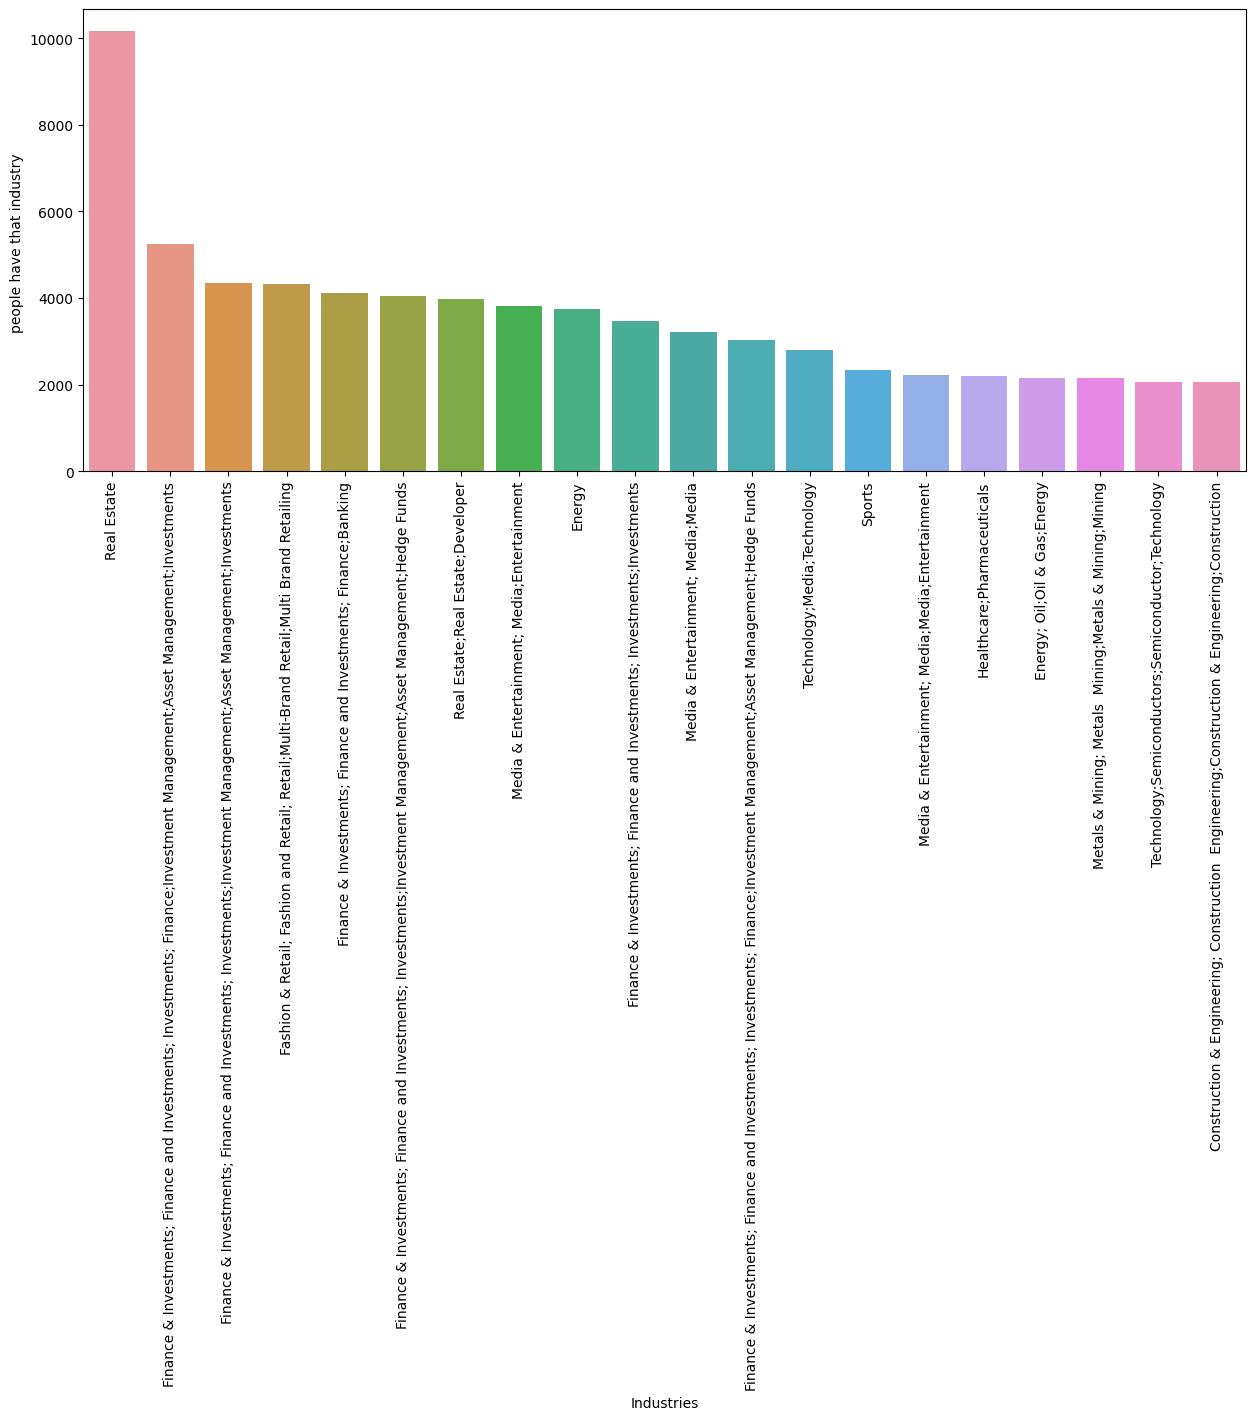

In [19]:
d1=pd.DataFrame(data['industry'].value_counts()).reset_index().head(20)
plt.figure(figsize=(15,6))
sns.barplot(data=d1,x='index',y='industry')
plt.xticks(rotation=90)
plt.xlabel('Industries')
plt.ylabel('people have that industry ')
plt.show()

Most of the billionar has real estate busnesses 

In [26]:
d2=pd.DataFrame(data['main_industry'].value_counts()).reset_index().head(20)
fig=px.bar(d2,x='index',y='main_industry')
fig.show()

as we seen that as we seen that most billianaris has main industry of finance and investment 

<AxesSubplot: xlabel='gender', ylabel='count'>

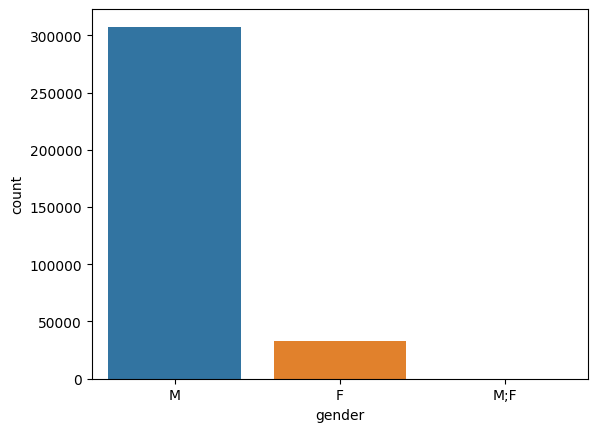

In [34]:
sns.countplot(x='gender',data=data)

MAle Female Ratio

In [36]:
data[['name','daily_income']]

name  daily_income
0       Abdulla bin Ahmad Al Ghurair        261928
1       Abdulla bin Ahmad Al Ghurair        399254
2       Abdulla bin Ahmad Al Ghurair        536021
3       Abdulla bin Ahmad Al Ghurair        410391
4       Abdulla bin Ahmad Al Ghurair        558904
...                              ...           ...
352364            Zygmunt Solorz-Zak        219780
352365            Zygmunt Solorz-Zak        207493
352366            Zygmunt Solorz-Zak        180887
352367            Zygmunt Solorz-Zak        231452
352368            Zygmunt Solorz-Zak        204986

[352369 rows x 2 columns]

In [50]:
d3=pd.DataFrame(data.groupby(['name','gender'])['daily_income'].mean().sort_values(ascending=False)).head(20).reset_index()
fig=px.bar(d3,x='name',y='daily_income',color='gender')
fig.show()

<Figure size 1500x600 with 0 Axes>

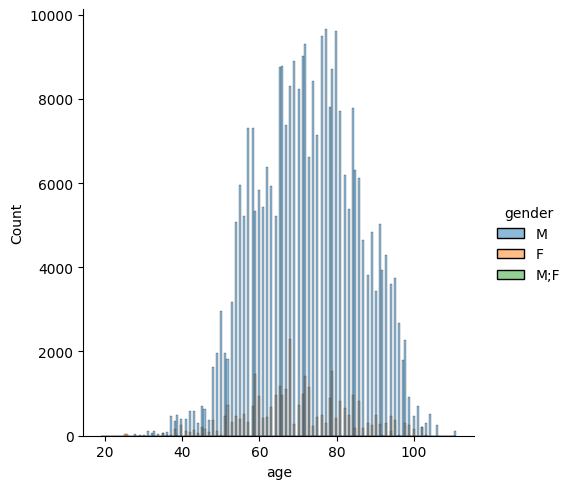

In [51]:
plt.figure(figsize=(15,6))
sns.displot(data=data,x='age',hue='gender')
plt.show()

# ANNual Income

In [62]:
d4=pd.DataFrame(data.groupby(['name','time','gender'])['annual_income'].mean().sort_values(ascending=False)).head(20).reset_index()
fig=px.bar(d4,x='name',y='annual_income',color='gender',animation_frame="time",log_y = True, range_y = [500000000, 120000000000])
fig.show()